# Time Series Forecasting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
series = pd.read_table('series.csv', sep=',')
series

,value
0,52.483570
1,49.352750
2,53.314735
3,57.711823
4,48.934444
...,...
1456,88.624756
1457,86.796990
1458,91.373250
1459,88.323830


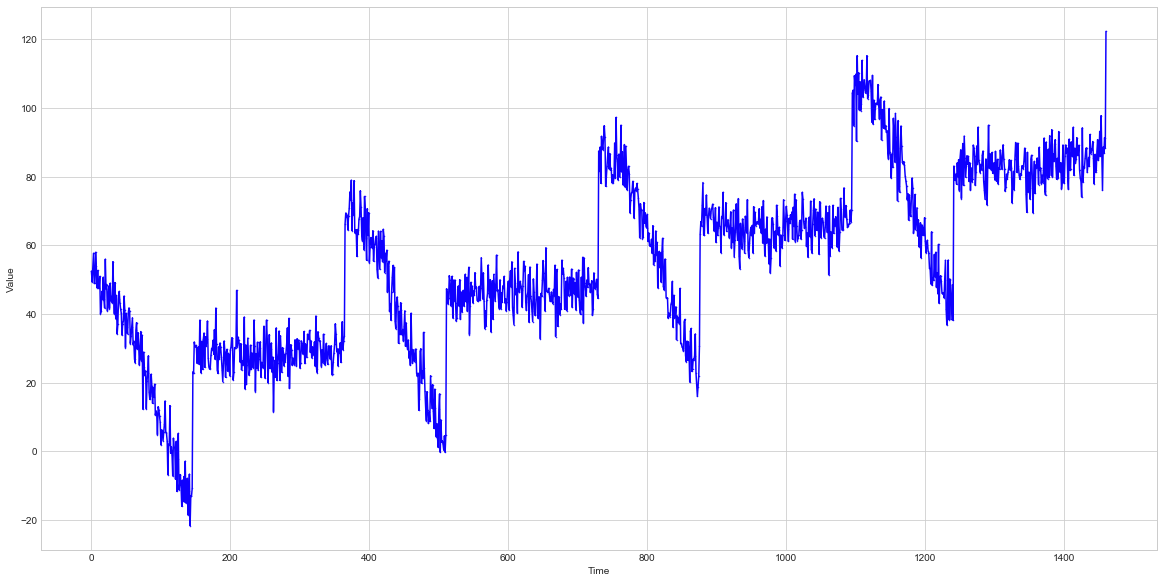

In [3]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.plot(series.values, marker='.', color='#0F00FF', markersize=1, linestyle='-')

In [4]:
split_time = 1000

t_train = np.array(range(0,split_time+1))
x_train = series.loc[:split_time,['value']].astype('float32').values

t_test = np.array(range(split_time+1,series.shape[0]+1))
x_test = series.loc[split_time:,['value']].astype('float32').values

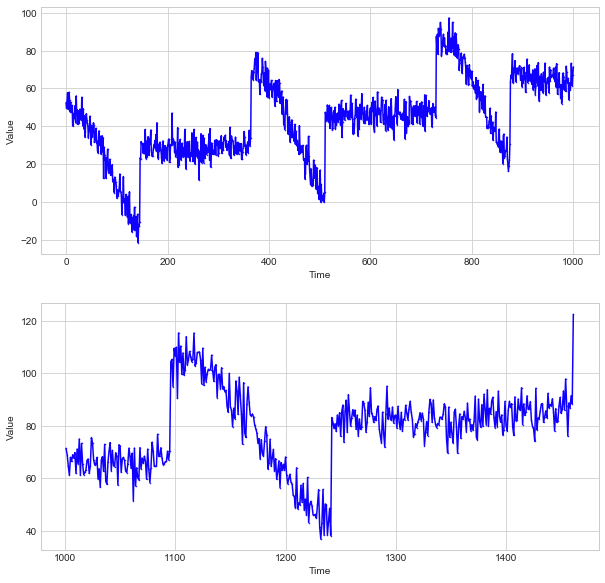

In [5]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.plot(t_train, x_train, marker='.', color='#0F00FF', markersize=1, linestyle='-')

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.plot(t_test, x_test, marker='.', color='#0F00FF', markersize=1, linestyle='-')

In [6]:
window_size = 10

X_train = []
Y_train = []
for i in range(x_train.shape[0]-window_size):
    X_train.append(x_train[i:i+window_size,0])
    Y_train.append(x_train[[i+window_size],0])
X_train = np.array(X_train, dtype='float32')
Y_train = np.array(Y_train, dtype='float32')

X_test = []
Y_test = []
for i in range(x_test.shape[0]-window_size):
    X_test.append(x_test[i:i+window_size,0])
    Y_test.append(x_test[[i+window_size],0])
X_test = np.array(X_test, dtype='float32')
Y_test = np.array(Y_test, dtype='float32')

In [7]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    f = tf.keras.layers.Dense(units=dims[1],
                              activation='linear',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros')
    x = tf.keras.Input(shape=dims[0])
    y = f(x)
    model = tf.keras.Model(x, y)   
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback1, callback2])
    return model

In [8]:
model = Model({'dims': [X_train.shape[1], Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 500, 
               'learning_rate': 0.1,
               'batch_size': 32})

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Train on 991 samples
Epoch 1/500
991/991 [==============================] - 0s 242us/sample - loss: 234.1267 - mae: 11.4999
Epoch 2/500
991/991 [==============================] - 0s 32us/sample - loss: 79.9210 - mae: 6.7485
Epoch 3/500
991/991 [==============================] - 0s 39us/sample - loss: 69.6098 - mae: 6.3183
Epoch 4/500
991/991 [==============================] - 0s 38us/sample - loss: 59.1509 - mae: 5.7273
Epoch 5/500
991/991 [==============================] - 0s 33us/sample - loss: 56.0229 - mae: 5.6193
Epo

Epoch 76/500
991/991 [==============================] - 0s 32us/sample - loss: 42.2430 - mae: 4.8481
Epoch 77/500
991/991 [==============================] - 0s 32us/sample - loss: 42.2503 - mae: 4.8489
Epoch 78/500
991/991 [==============================] - 0s 29us/sample - loss: 42.2447 - mae: 4.8484
Epoch 79/500
991/991 [==============================] - 0s 29us/sample - loss: 42.2445 - mae: 4.8488
Epoch 80/500
991/991 [==============================] - 0s 28us/sample - loss: 42.2508 - mae: 4.8502
Epoch 81/500
991/991 [==============================] - 0s 30us/sample - loss: 42.2544 - mae: 4.8489


In [9]:
model.evaluate(X_train, Y_train)

991/991 [==============================] - 0s 64us/sample - loss: 42.2365 - mae: 4.8476


[42.236510552984676, 4.8476343]

In [10]:
model.evaluate(X_test, Y_test)

451/451 [==============================] - 0s 28us/sample - loss: 45.8497 - mae: 4.9823


[45.8496645908398, 4.982271]

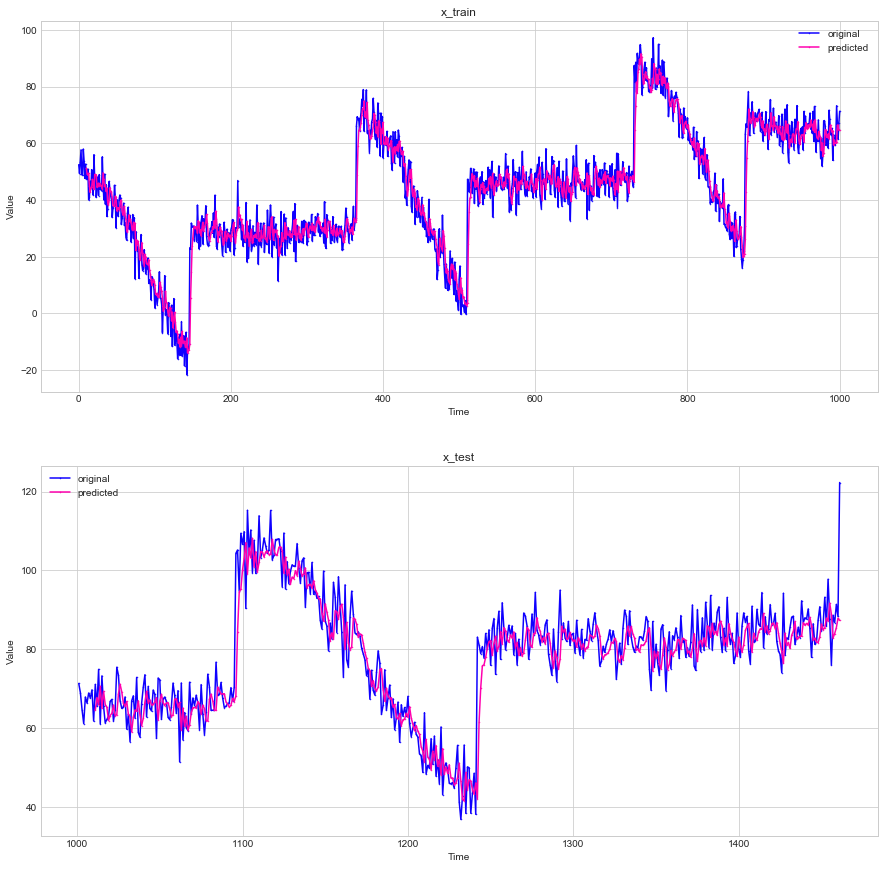

In [11]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('x_train')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.plot(t_train, x_train, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='original')
ax1.plot(t_train[window_size:], model.predict(X_train).flatten(), marker='.', color='#FF00AE', markersize=1, linestyle='-', label='predicted')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('x_test')
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.plot(t_test, x_test, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='original')
ax2.plot(t_test[window_size:], model.predict(X_test).flatten(), marker='.', color='#FF00AE', markersize=1, linestyle='-', label='predicted')
ax2.legend()

-----

In [12]:
def Model_(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    f1 = tf.keras.layers.Dense(units=10,
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros')
    f2 = tf.keras.layers.Dense(units=10,
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(units=dims[1],
                               activation='linear',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros')
    x = tf.keras.Input(shape=dims[0])
    a1 = f1(x)
    a2 = f2(a1)
    y = f3(a2)
    model = tf.keras.Model(x, y)   
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback1, callback2])
    return model

In [13]:
model_ = Model_({'dims': [X_train.shape[1], Y_train.shape[1]], 
                 'X_train': X_train,
                 'Y_train': Y_train,
                 'epochs': 500, 
                 'learning_rate': 0.1,
                 'batch_size': 32})

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
Train on 991 samples
Epoch 1/500
991/991 [==============================] - 0s 271us/sample - loss: 575.0346 - mae: 15.7138
Epoch 2/500
991/991 [==============================] - 0s 33us/sample - loss: 78.8003 - mae: 6.4238
Epoch 3/500
991/991 [==============

In [14]:
model_.evaluate(X_train, Y_train)

991/991 [==============================] - 0s 76us/sample - loss: 42.6106 - mae: 4.8729


[42.61055506755317, 4.872901]

In [15]:
model_.evaluate(X_test, Y_test)

451/451 [==============================] - 0s 28us/sample - loss: 44.7922 - mae: 4.9336


[44.79216642866113, 4.93359]

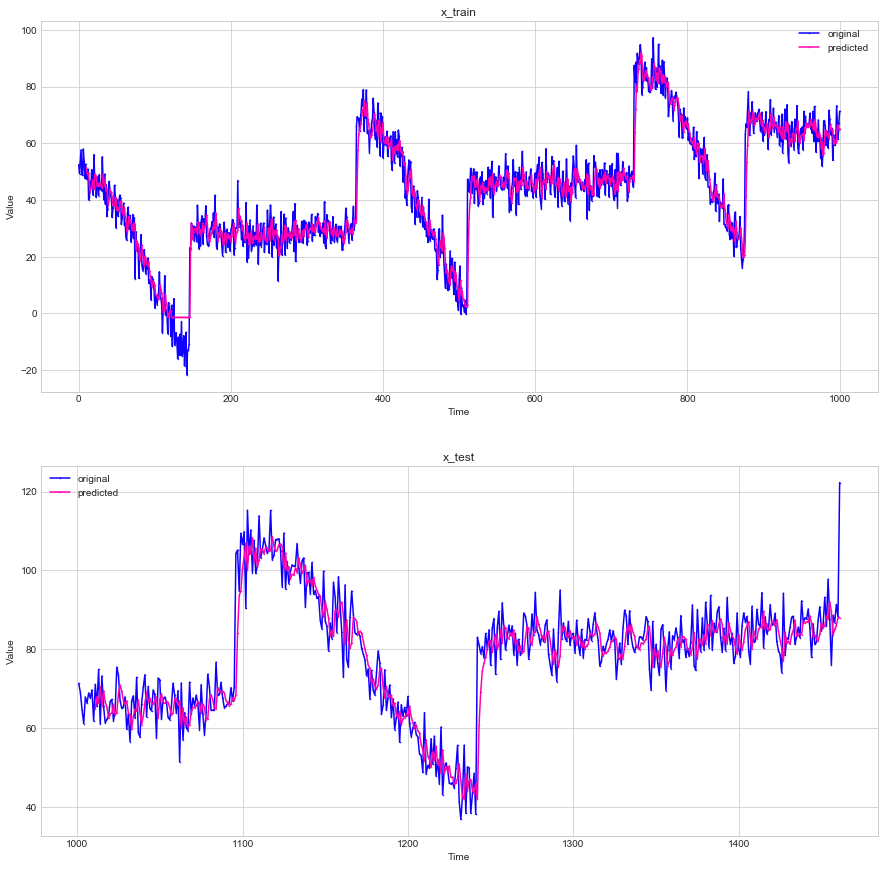

In [16]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('x_train')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.plot(t_train, x_train, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='original')
ax1.plot(t_train[window_size:], model_.predict(X_train).flatten(), marker='.', color='#FF00AE', markersize=1, linestyle='-', label='predicted')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('x_test')
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.plot(t_test, x_test, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='original')
ax2.plot(t_test[window_size:], model_.predict(X_test).flatten(), marker='.', color='#FF00AE', markersize=1, linestyle='-', label='predicted')
ax2.legend()

-----

In [17]:
def Model__(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    f1 = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1))
    f2 = tf.keras.layers.Conv1D(filters=32, 
                                kernel_size=5, 
                                strides=1,
                                padding='causal',
                                activation='relu',
                                kernel_initializer='glorot_uniform',
                                bias_initializer='zeros', 
                                kernel_regularizer='l2')
    f3 = tf.keras.layers.LSTM(units=32,
                              activation='tanh',
                              recurrent_activation='sigmoid',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros',
                              recurrent_initializer='zeros',
                              return_sequences=True,
                              return_state = False, 
                              kernel_regularizer='l2')
    f4 = tf.keras.layers.LSTM(units=32,
                              activation='tanh',
                              recurrent_activation='sigmoid',
                              kernel_initializer='glorot_uniform',
                              bias_initializer='zeros',
                              recurrent_initializer='zeros',
                              return_sequences=False,
                              return_state = False, 
                              kernel_regularizer='l2')
    f5 = tf.keras.layers.Dense(units=10,
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros',
                               kernel_regularizer='l2')
    f6 = tf.keras.layers.Dense(units=10,
                               activation='relu',
                               kernel_initializer='glorot_uniform',
                               bias_initializer='zeros',
                               kernel_regularizer='l2')
    f7 = tf.keras.layers.Dense(units=dims[1],
                                activation='linear',
                                kernel_initializer='glorot_uniform',
                                bias_initializer='zeros',
                                kernel_regularizer='l2')
    f8 = tf.keras.layers.Lambda(lambda x: x*100.0)
    x = tf.keras.Input(shape=dims[0])
    a1 = f1(x)
    a2 = f2(a1)
    a3 = f3(a2)
    a4 = f4(a3)
    a5 = f5(a4)
    a6 = f6(a5)
    a7 = f7(a6)
    y = f8(a7)
    model = tf.keras.Model(x, y)   
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='mse', metrics=['mae'], optimizer=optimizer)
    model.summary()
    callback1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', 
                                                     patience=10,
                                                     min_delta=0.001,
                                                     factor=0.1, 
                                                     min_lr=0.0001)
    callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                 patience=20,
                                                 min_delta=0.001)
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, callbacks=[callback1, callback2])
    return model

In [18]:
model__ = Model__({'dims': [X_train.shape[1], Y_train.shape[1]], 
                   'X_train': X_train,
                   'Y_train': Y_train,
                   'epochs': 1000, 
                   'learning_rate': 0.01,
                   'batch_size': 64})

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
lambda (Lambda)              (None, 10, 1)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 10, 32)            192       
_________________________________________________________________
lstm (LSTM)                  (None, 10, 32)            8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110 

991/991 [==============================] - 0s 168us/sample - loss: 31.3933 - mae: 4.1067
Epoch 145/1000
991/991 [==============================] - 0s 164us/sample - loss: 31.4645 - mae: 4.0997
Epoch 146/1000
991/991 [==============================] - 0s 167us/sample - loss: 31.3673 - mae: 4.0985
Epoch 147/1000
991/991 [==============================] - 0s 226us/sample - loss: 31.3491 - mae: 4.0989
Epoch 148/1000
991/991 [==============================] - 0s 164us/sample - loss: 31.3551 - mae: 4.0983
Epoch 149/1000
991/991 [==============================] - 0s 204us/sample - loss: 31.3742 - mae: 4.0985
Epoch 150/1000
991/991 [==============================] - 0s 173us/sample - loss: 31.4664 - mae: 4.0989
Epoch 151/1000
991/991 [==============================] - 0s 191us/sample - loss: 31.3921 - mae: 4.1100
Epoch 152/1000
991/991 [==============================] - 0s 194us/sample - loss: 31.5453 - mae: 4.1080
Epoch 153/1000
991/991 [==============================] - 0s 172us/sample - los

Epoch 223/1000
991/991 [==============================] - 0s 171us/sample - loss: 30.9978 - mae: 4.0659
Epoch 224/1000
991/991 [==============================] - 0s 166us/sample - loss: 30.9400 - mae: 4.0682
Epoch 225/1000
991/991 [==============================] - 0s 160us/sample - loss: 31.0005 - mae: 4.0637
Epoch 226/1000
991/991 [==============================] - 0s 169us/sample - loss: 30.9136 - mae: 4.0606
Epoch 227/1000
991/991 [==============================] - 0s 170us/sample - loss: 31.0508 - mae: 4.0734
Epoch 228/1000
991/991 [==============================] - 0s 169us/sample - loss: 30.9295 - mae: 4.0558
Epoch 229/1000
991/991 [==============================] - 0s 174us/sample - loss: 30.9504 - mae: 4.0658
Epoch 230/1000
991/991 [==============================] - 0s 173us/sample - loss: 31.0271 - mae: 4.0666
Epoch 231/1000
991/991 [==============================] - 0s 164us/sample - loss: 31.0231 - mae: 4.0598
Epoch 232/1000
991/991 [==============================] - 0s 163

Epoch 380/1000
991/991 [==============================] - 0s 156us/sample - loss: 30.2971 - mae: 3.9919
Epoch 381/1000
991/991 [==============================] - 0s 155us/sample - loss: 30.1861 - mae: 3.9822
Epoch 382/1000
991/991 [==============================] - 0s 154us/sample - loss: 30.2270 - mae: 3.9864
Epoch 383/1000
991/991 [==============================] - 0s 156us/sample - loss: 30.2046 - mae: 3.9844
Epoch 384/1000
991/991 [==============================] - 0s 155us/sample - loss: 30.2220 - mae: 3.9914
Epoch 385/1000
991/991 [==============================] - 0s 157us/sample - loss: 30.2083 - mae: 3.9862
Epoch 386/1000
991/991 [==============================] - 0s 164us/sample - loss: 30.1822 - mae: 3.9766
Epoch 387/1000
991/991 [==============================] - 0s 168us/sample - loss: 30.1931 - mae: 3.9846
Epoch 388/1000
991/991 [==============================] - 0s 162us/sample - loss: 30.2431 - mae: 3.9818
Epoch 389/1000
991/991 [==============================] - 0s 167

Epoch 537/1000
991/991 [==============================] - 0s 157us/sample - loss: 29.6893 - mae: 3.9380
Epoch 538/1000
991/991 [==============================] - 0s 160us/sample - loss: 29.5887 - mae: 3.9204
Epoch 539/1000
991/991 [==============================] - 0s 158us/sample - loss: 29.6438 - mae: 3.9309
Epoch 540/1000
991/991 [==============================] - 0s 166us/sample - loss: 29.5709 - mae: 3.9214
Epoch 541/1000
991/991 [==============================] - 0s 181us/sample - loss: 29.5914 - mae: 3.9183
Epoch 542/1000
991/991 [==============================] - 0s 180us/sample - loss: 29.5555 - mae: 3.9251
Epoch 543/1000
991/991 [==============================] - 0s 260us/sample - loss: 29.5083 - mae: 3.9126
Epoch 544/1000
991/991 [==============================] - 0s 221us/sample - loss: 29.6328 - mae: 3.9247
Epoch 545/1000
991/991 [==============================] - 0s 180us/sample - loss: 29.7006 - mae: 3.9475
Epoch 546/1000
991/991 [==============================] - 0s 167

Epoch 694/1000
991/991 [==============================] - 0s 168us/sample - loss: 28.8462 - mae: 3.8615
Epoch 695/1000
991/991 [==============================] - 0s 166us/sample - loss: 28.9811 - mae: 3.8893
Epoch 696/1000
991/991 [==============================] - 0s 158us/sample - loss: 28.8366 - mae: 3.8616
Epoch 697/1000
991/991 [==============================] - 0s 161us/sample - loss: 28.8172 - mae: 3.8512
Epoch 698/1000
991/991 [==============================] - 0s 164us/sample - loss: 28.9012 - mae: 3.8847
Epoch 699/1000
991/991 [==============================] - 0s 160us/sample - loss: 28.7966 - mae: 3.8575
Epoch 700/1000
991/991 [==============================] - 0s 163us/sample - loss: 28.8130 - mae: 3.8623
Epoch 701/1000
991/991 [==============================] - 0s 160us/sample - loss: 28.8050 - mae: 3.8603
Epoch 702/1000
991/991 [==============================] - 0s 162us/sample - loss: 28.8544 - mae: 3.8834
Epoch 703/1000
991/991 [==============================] - 0s 176

Epoch 851/1000
991/991 [==============================] - 0s 155us/sample - loss: 28.1104 - mae: 3.8145
Epoch 852/1000
991/991 [==============================] - 0s 150us/sample - loss: 28.0681 - mae: 3.8153
Epoch 853/1000
991/991 [==============================] - 0s 149us/sample - loss: 28.1037 - mae: 3.8085
Epoch 854/1000
991/991 [==============================] - 0s 152us/sample - loss: 28.0867 - mae: 3.8100
Epoch 855/1000
991/991 [==============================] - 0s 149us/sample - loss: 28.1213 - mae: 3.8098
Epoch 856/1000
991/991 [==============================] - 0s 155us/sample - loss: 28.2298 - mae: 3.8174
Epoch 857/1000
991/991 [==============================] - 0s 157us/sample - loss: 28.2032 - mae: 3.8204
Epoch 858/1000
991/991 [==============================] - 0s 155us/sample - loss: 28.0088 - mae: 3.8066
Epoch 859/1000
991/991 [==============================] - 0s 157us/sample - loss: 28.3580 - mae: 3.8289
Epoch 860/1000
991/991 [==============================] - 0s 154

In [19]:
model__.evaluate(X_train, Y_train)

991/991 [==============================] - 1s 853us/sample - loss: 27.3120 - mae: 3.7698


[27.312033536816703, 3.7698255]

In [20]:
model__.evaluate(X_test, Y_test)

451/451 [==============================] - 0s 80us/sample - loss: 49.9364 - mae: 5.2606


[49.93637328560231, 5.2606044]

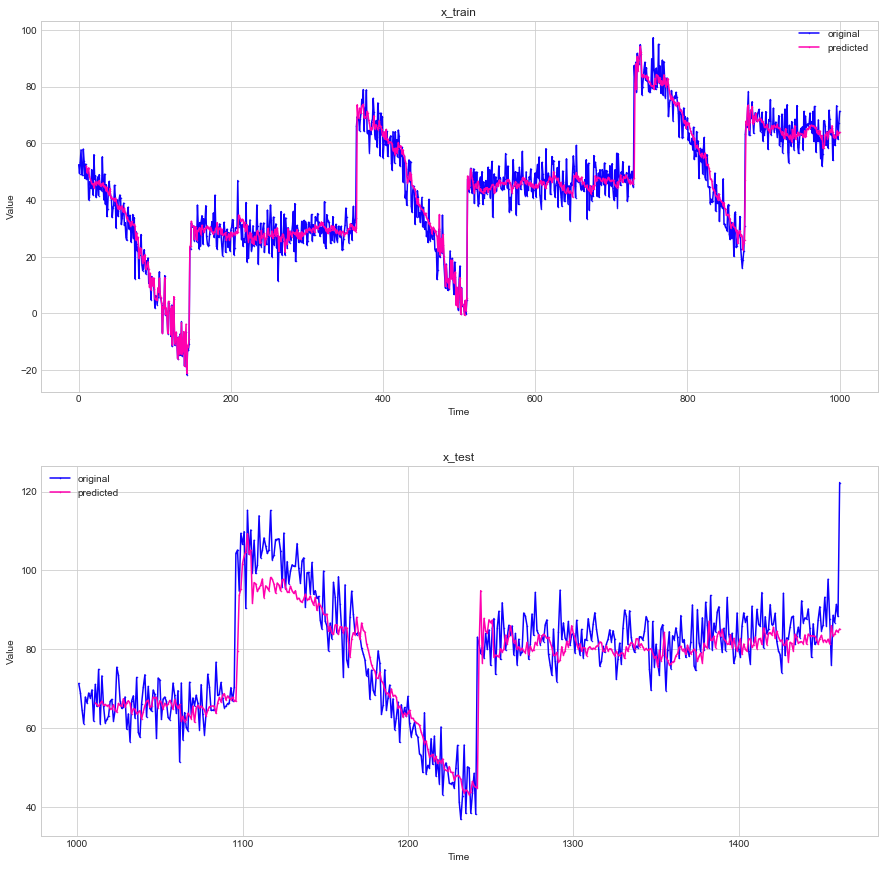

In [21]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('x_train')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.plot(t_train, x_train, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='original')
ax1.plot(t_train[window_size:], model__.predict(X_train).flatten(), marker='.', color='#FF00AE', markersize=1, linestyle='-', label='predicted')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('x_test')
ax2.set_xlabel('Time')
ax2.set_ylabel('Value')
ax2.plot(t_test, x_test, marker='.', color='#0F00FF', markersize=1, linestyle='-', label='original')
ax2.plot(t_test[window_size:], model__.predict(X_test).flatten(), marker='.', color='#FF00AE', markersize=1, linestyle='-', label='predicted')
ax2.legend()